# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [43]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [44]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [45]:
#  1. Get the total rides for each city type
city_type_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_type_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [46]:
# 2. Get the total drivers for each city type
city_type_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
city_type_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [47]:
#  3. Get the total amount of fares for each city type
city_type_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
city_type_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [48]:
#  4. Get the average fare per ride for each city type. 
citytype_avg_fare = city_type_fares/city_type_rides 
citytype_avg_fare.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [49]:
# 5. Get the average fare per driver for each city type. 
driver_avgfare_citytype = city_type_fares/city_type_drivers
driver_avgfare_citytype.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [50]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame({
    "Total Rides": city_type_rides,
    "Total Drivers": city_type_drivers,
    "Total Fares":city_type_fares,
    "Average Fare per Ride": citytype_avg_fare,
    "Average Fare per Driver":driver_avgfare_citytype})

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [51]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [52]:
#  8. Format the columns.
# set ALL float columns to '${:,.2f}'
format_df = {col_name: '${:,.2f}' for col_name in pyber_summary_df.select_dtypes(float).columns}
pyber_summary_df.head().style.format(format_df)


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [53]:
# These 2 cells do the same thing as the cell above. Great job on finding this on your own!!
# pyber_summary_df['Total Fares']=pyber_summary_df['Total Fares'].map("${:,.2f}".format)
# pyber_summary_df['Average Fare per Ride']=pyber_summary_df['Average Fare per Ride'].map("${:,.2f}".format)
# pyber_summary_df['Average Fare per Driver']=pyber_summary_df['Average Fare per Driver'].map("${:,.2f}".format)

In [54]:
# format_df={}
# for col_name in pyber_summary_df.select_dtypes(float).columns:
#     format_df[col_name]=col_name.map("${:,.2f}".format)
    

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [55]:
# Print the merged DataFrame for reference.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [56]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [57]:
# pyber_data_df.ride_id = pyber_data_df.ride_id.astype("int64")
# pyber_data_df.head()

In [58]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_dataframe = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
fares_dataframe

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [59]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#we are removing the multi index and putting the date and type into columns
fares_dataframe = fares_dataframe.reset_index()
fares_dataframe.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [61]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
fares_dataframe_pivot_df = fares_dataframe.pivot(index="date", columns="type", values="fare")
fares_dataframe_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [64]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
pivot_dates_df = fares_dataframe_pivot_df.loc['2019-01-01':'2019-04-28']
pivot_dates_df.tail()


type,Rural,Suburban,Urban
date,,,
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28
2019-04-27 23:26:03,NaN,NaN,19.06
2019-04-27 23:52:44,NaN,45.98,NaN


In [65]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_dates_df.index = pd.to_datetime(pivot_dates_df.index)
pivot_dates_df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [66]:
# 6. Check that the datatype for the index is datetime using df.info()
pivot_dates_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [67]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_dates_df = pivot_dates_df.resample('W').sum()
pivot_dates_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


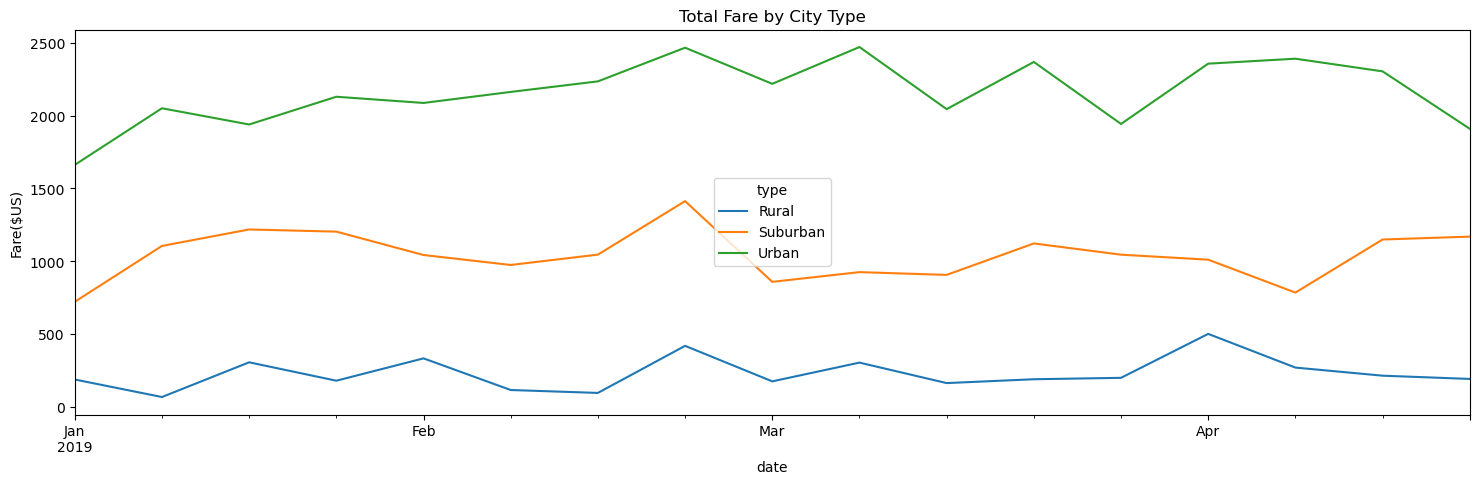

In [68]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
#style.use('fivethirtyeight')
pivot_dates_df.plot(figsize=(18,5))
plt.xlabel("date")
plt.ylabel("Fare($US)")
plt.title("Total Fare by City Type")
plt.savefig("Resources/PyBer_fare_summary.png")

